# BUDT 758J - Team Project - House Prices - Advanced Regression Techniques
## Team 13

## Load Train and Test Datasets

In [ ]:
#Source of Datasets: "https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data"

import pandas as pd
train_dataset = pd.read_excel('Dataset.xlsx')
test_dataset = pd.read_excel('Test.xlsx')

## EDA

In [ ]:
#list all the columns in the train dataset
train_dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
#list all columns in test dataset
test_dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
#count the number of NA values for each column in train dataset
na_counts = train_dataset.isna().sum()
columns_with_na = na_counts[na_counts > 0]

print("Columns with NA values and their counts:")
print(columns_with_na)

Columns with NA values and their counts:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
#count the number of NA values for each column in train dataset
na_counts = test_dataset.isna().sum()
columns_with_na = na_counts[na_counts > 0]

print("Columns with NA values and their counts:")
print(columns_with_na)

Columns with NA values and their counts:
MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [ ]:
train_dataset['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Cleaning Train Dataset

In [ ]:
#referring to codes on kaggle we set the threshhold to<=81
train_dataset_cleaned = train_dataset.dropna(axis=1, thresh=len(train_dataset) - 81)
train_dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [ ]:
# Cleaning the training dataset and replacing NA values using weighted average method
import pandas as pd
import numpy as np

def replace_na_values(column_names, dataset):
    for column_name in column_names:
        # Creating pivot table to view the current data distribution
        pivot_table_before = dataset[column_name].value_counts()

        # Viewing the current data distribution
        print(f"Pivot table for {column_name} before replacing NA values:")
        print(pivot_table_before)

        # Replacing NA values as a process of cleaning the data
        total_counts = pivot_table_before.sum()
        proportions = pivot_table_before / total_counts
        na_count = dataset[column_name].isna().sum()
        proportions_with_na = proportions.add((na_count / total_counts) * proportions, fill_value=0)

        # Creating a pivot table to count occurrences of non-missing values after replacing NA values
        pivot_table_after = np.floor(proportions_with_na * total_counts).astype(int)

        # Viewing the new split and results
        print(f"\nPivot table for {column_name} after adjusting for NaN values:")
        print(pivot_table_after)

# Column names
columns_to_process = ['BsmtQual', 'BsmtCond', 'BsmtExposure',
                     'BsmtFinType1', 'BsmtFinType2',
                     'GarageType', 'GarageFinish',
                     'GarageQual', 'GarageCond']

# Replace NA values for all specified columns
replace_na_values(columns_to_process, train_dataset_cleaned)

Pivot table for BsmtQual before replacing NA values:
BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

Pivot table for BsmtQual after adjusting for NaN values:
BsmtQual
TA    665
Gd    634
Ex    124
Fa     35
Name: count, dtype: int64
Pivot table for BsmtCond before replacing NA values:
BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

Pivot table for BsmtCond after adjusting for NaN values:
BsmtCond
TA    1345
Gd      66
Fa      46
Po       2
Name: count, dtype: int64
Pivot table for BsmtExposure before replacing NA values:
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

Pivot table for BsmtExposure after adjusting for NaN values:
BsmtExposure
No    978
Av    226
Gd    137
Mn    117
Name: count, dtype: int64
Pivot table for BsmtFinType1 before replacing NA values:
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

Pivot table for BsmtFinType1 a

In [ ]:
# Cleaning Columns MasVnrArea, GarageYrBlt and Electrical
train_dataset_cleaned['MasVnrArea'].fillna(train_dataset_cleaned['MasVnrArea'].mean(), inplace=True) # Replacing with mean of the column
train_dataset_cleaned['GarageYrBlt'].fillna(train_dataset_cleaned['GarageYrBlt'].mean(), inplace=True) # Replacing with mean of the column
train_dataset_cleaned['Electrical'].fillna("SBrkr", inplace=True) #Replacing with SBrkr since it is the most common value. based on mode value

<ipython-input-13-d1d70bc7c564>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dataset_cleaned['MasVnrArea'].fillna(train_dataset_cleaned['MasVnrArea'].mean(), inplace=True) # Replacing with mean of the column
<ipython-input-13-d1d70bc7c564>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dataset_cleaned['GarageYrBlt'].fillna(train_dataset_cleaned['GarageYrBlt'].mean(), inplace=True) # Replacing with mean of the column
<ipython-input-13-d1d70bc7c564>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

## Visualizing Training Data


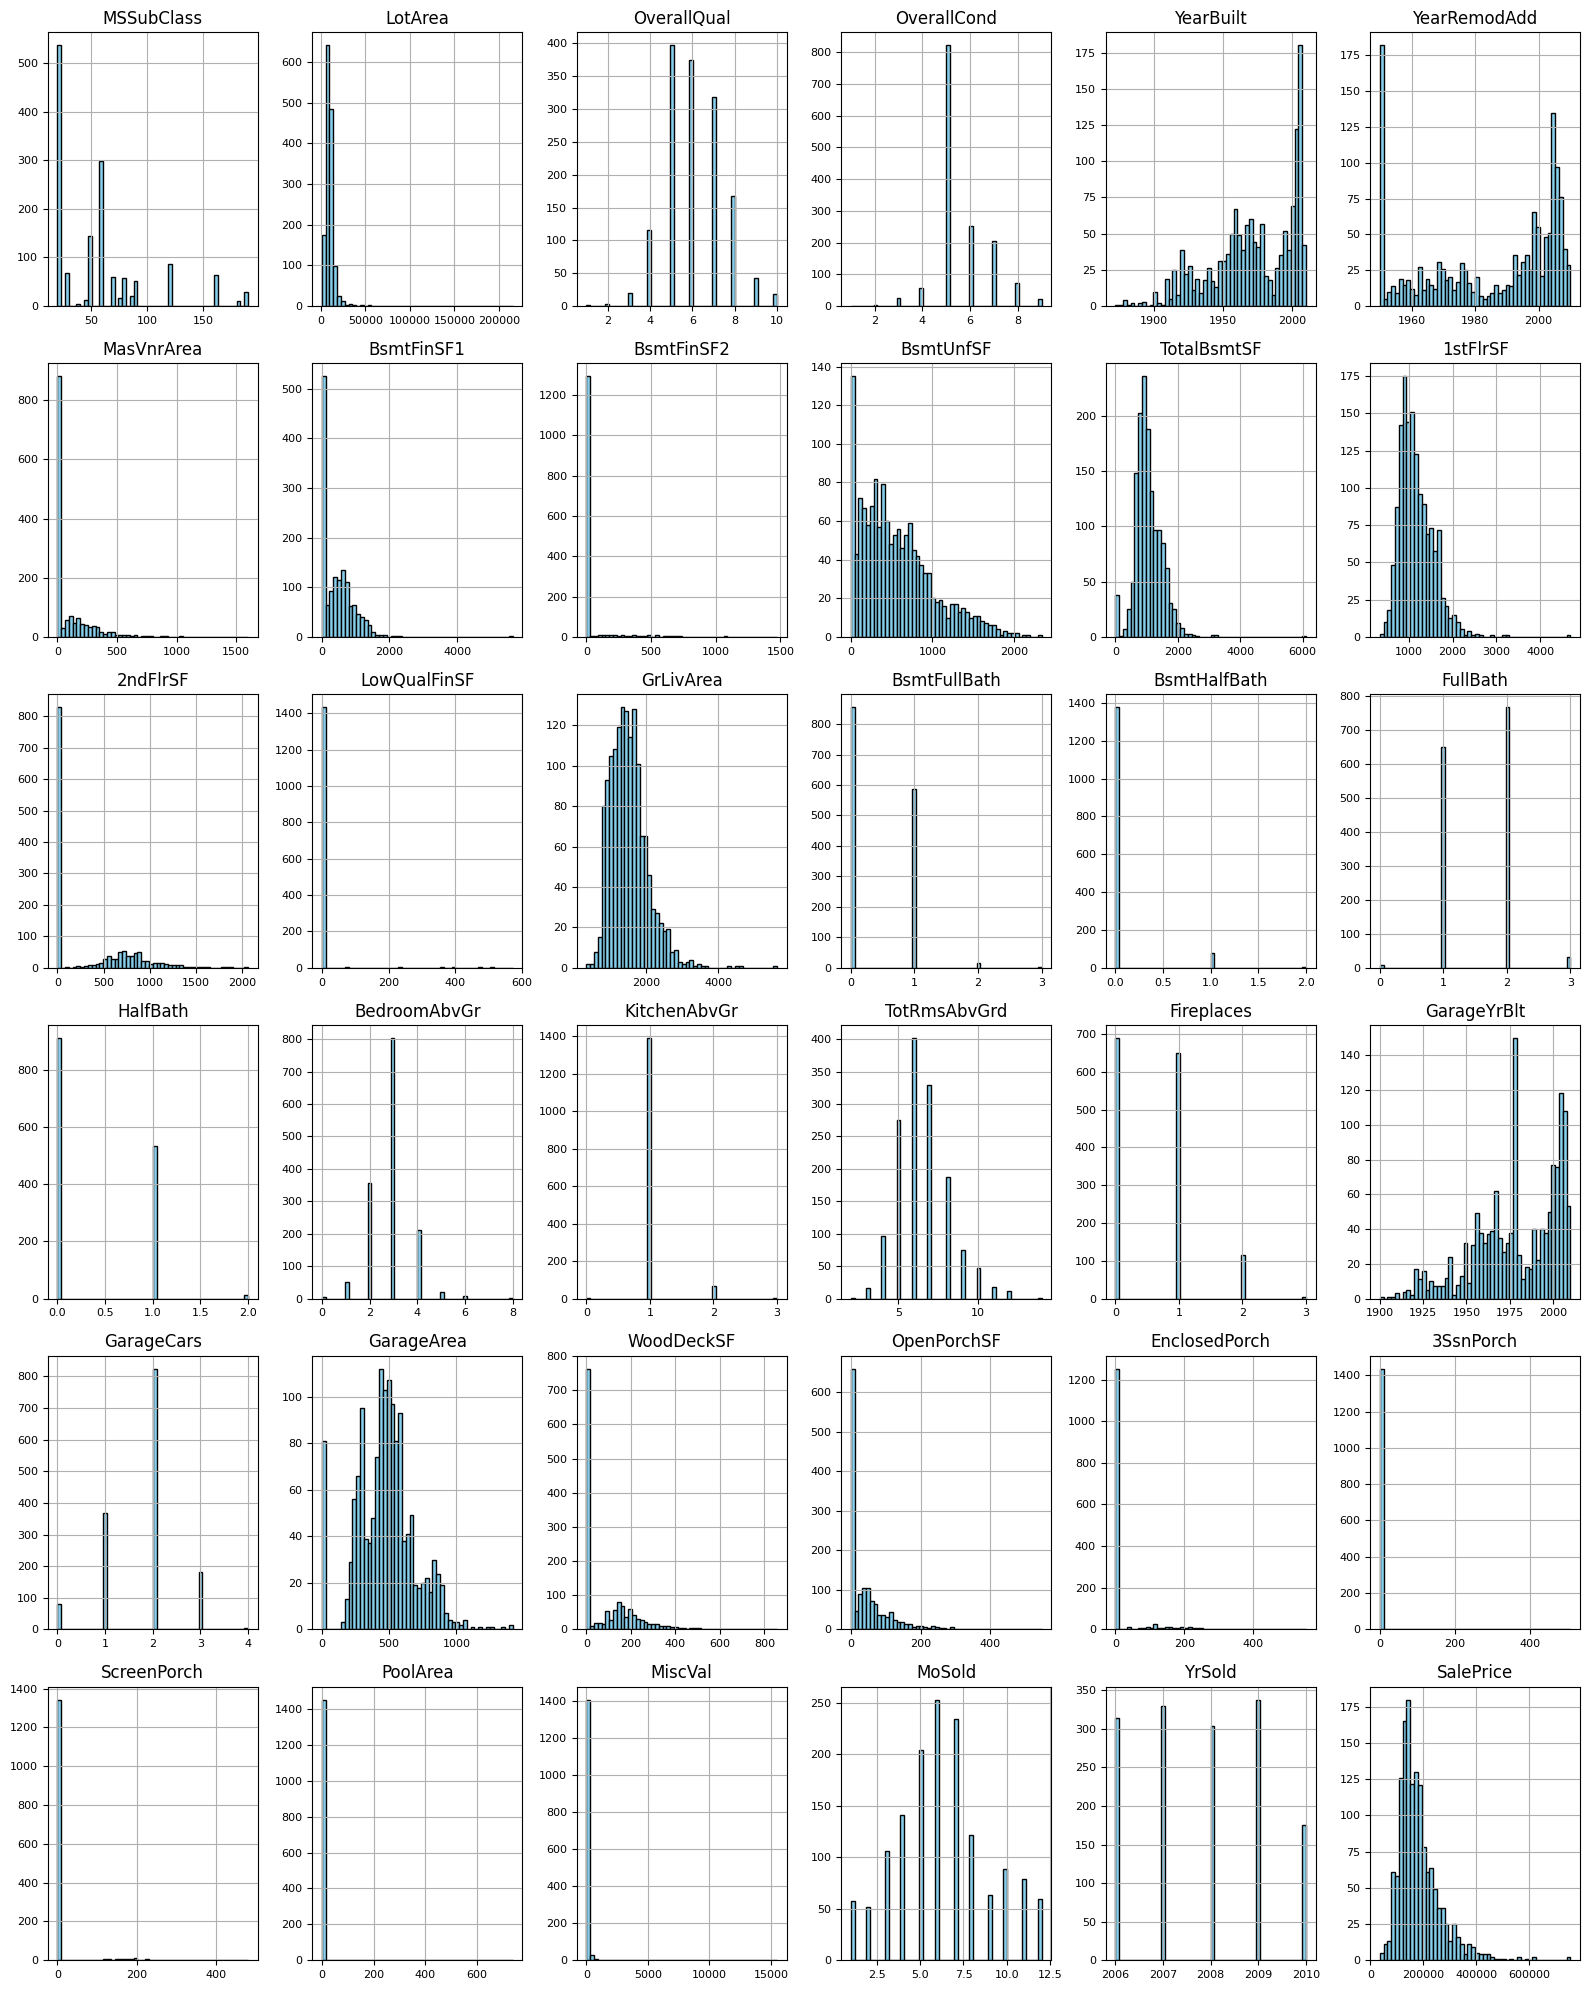

In [ ]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
#plotting the distributions of the columns to analyse the distribution of values to identify data's characteristics and potential patterns and outliers
import matplotlib.pyplot as plt

visual_cleaned_train = train_dataset_cleaned.drop(columns=['Id'])
visual_cleaned_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

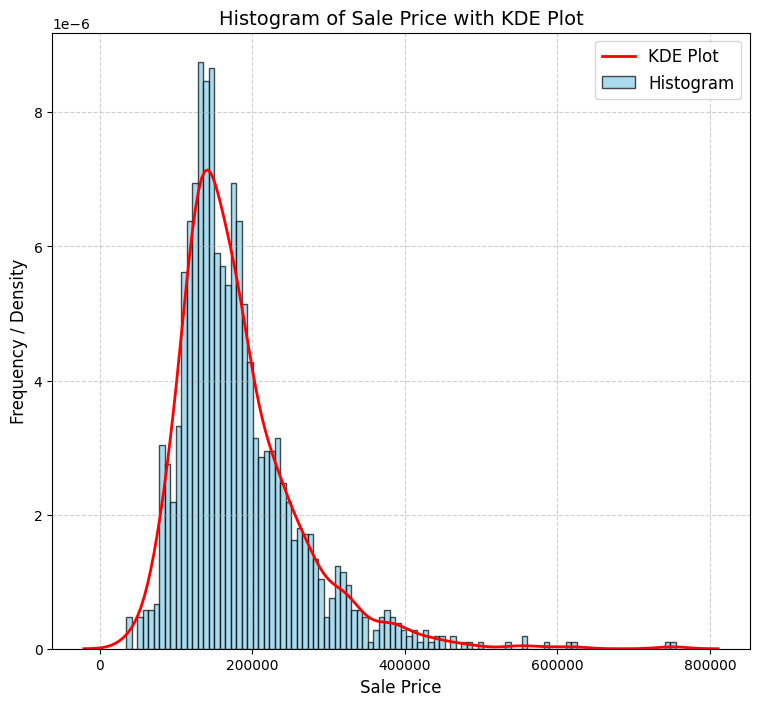

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 8))

plt.hist(train_dataset_cleaned['SalePrice'], bins=100, color='skyblue', edgecolor='black', alpha=0.7, density=True)
sns.kdeplot(train_dataset_cleaned['SalePrice'], color='red', linewidth=2)
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Frequency / Density', fontsize=12)
plt.title('Histogram of Sale Price with KDE Plot', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(labels=['KDE Plot', 'Histogram'], loc='upper right', fontsize='large')
plt.show()

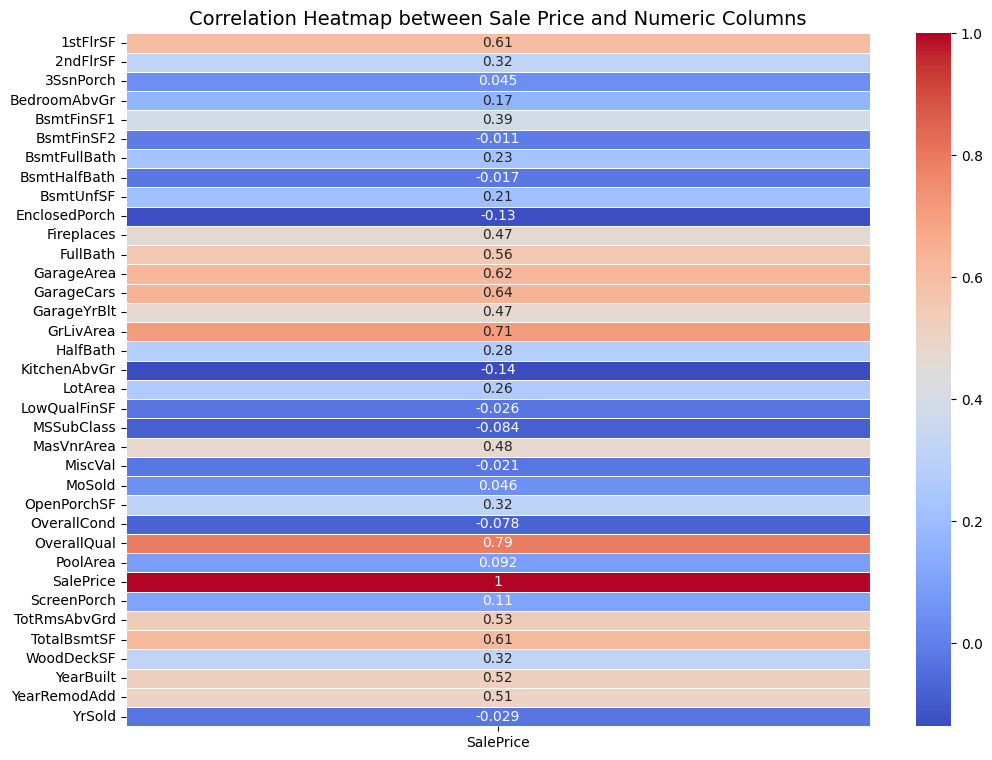

In [ ]:
#Correlation Matrix for Numeric Columns vs Sale Price
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = train_dataset_cleaned.select_dtypes(include=['int64', 'float64']).columns
numeric_columns_ex_Id = numeric_columns.difference(['Id'])
correlation_matrix = train_dataset_cleaned[numeric_columns_ex_Id].corr()

plt.figure(figsize=(12, 9))

sns.heatmap(correlation_matrix[['SalePrice']], annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap between Sale Price and Numeric Columns', fontsize=14)
plt.show()

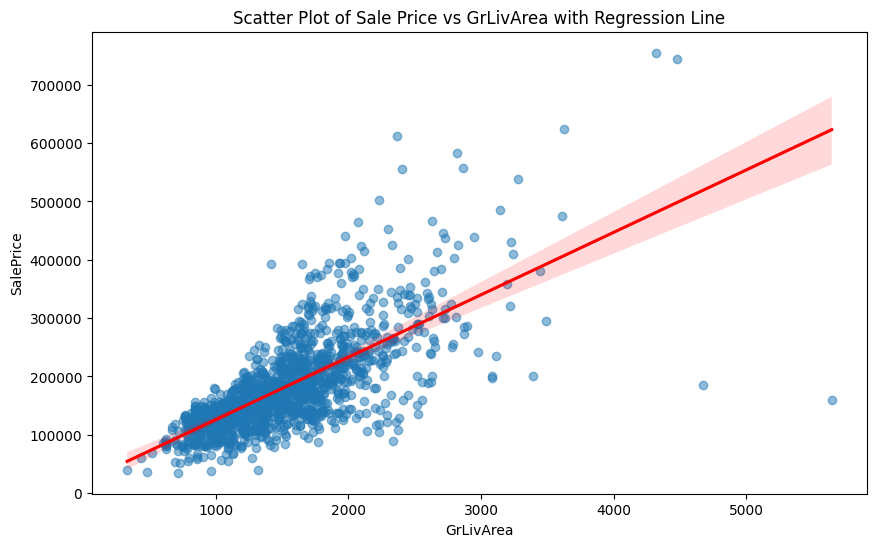

In [ ]:
#Scatter Plot of Sale Price vs GrLivArea
# https://seaborn.pydata.org/generated/seaborn.regplot.html
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='GrLivArea', y='SalePrice', data=train_dataset_cleaned, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Scatter Plot of Sale Price vs GrLivArea with Regression Line')
plt.show()

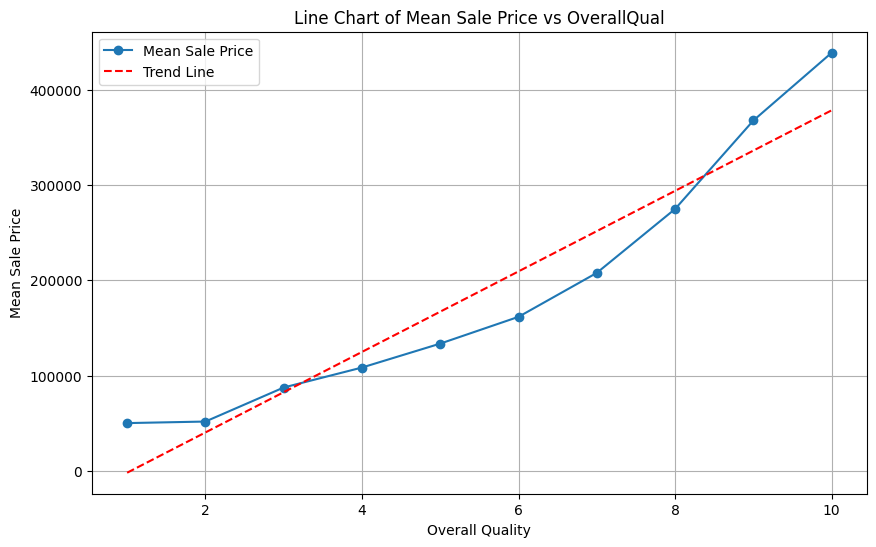

In [ ]:
#https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
#https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html

#Graph of Means sales price over different quality scores

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mean_sale_price = train_dataset_cleaned.groupby('OverallQual')['SalePrice'].mean().reset_index()

x = mean_sale_price['OverallQual']
y = mean_sale_price['SalePrice']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 6))
plt.plot(mean_sale_price['OverallQual'], mean_sale_price['SalePrice'], marker='o', linestyle='-', label='Mean Sale Price')
plt.plot(x, p(x), color='red', linestyle='--', label='Trend Line')
plt.xlabel('Overall Quality')
plt.ylabel('Mean Sale Price')
plt.title('Line Chart of Mean Sale Price vs OverallQual')
plt.grid(True)
plt.legend()
plt.show()


## Cleaning Test Dataset

In [ ]:
# Removing the same columns as the Training Dataset

columns_before = train_dataset.columns

columns_after = train_dataset_cleaned.columns

# Names of columns that were removed in Train Data
dropped_columns = set(columns_before) - set(columns_after)

columns_to_drop = list(dropped_columns)

# Dropping the same columns from the test dataset
test_dataset_cleaned = test_dataset.drop(columns=columns_to_drop)

test_dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [ ]:
import pandas as pd
import numpy as np

def replace_na_values(column_names, dataset):
    for column_name in column_names:
        # Creating pivot table to view the current data distribution
        pivot_table_before_test = dataset[column_name].value_counts()

        # Viewing the current data distribution
        print(f"Pivot table for {column_name} before replacing NA values:")
        print(pivot_table_before_test)

        # Replacing NA values as a process of cleaning the data
        total_counts_test = pivot_table_before_test.sum()
        proportions_test = pivot_table_before_test / total_counts_test
        na_count_test = dataset[column_name].isna().sum()
        proportions_with_na_test = proportions_test.add((na_count_test / total_counts_test) * proportions_test, fill_value=0)

        # Creating a pivot table to count occurrences of non-missing values after replacing NA values
        pivot_table_after_test = np.floor(proportions_with_na_test * total_counts_test).astype(int)

        # Viewing the new split and results
        print(f"\nPivot table for {column_name} after adjusting for NaN values:")
        print(pivot_table_after_test)

# Column names
columns_to_process_test = ['BsmtQual', 'BsmtCond', 'BsmtExposure',
                     'BsmtFinType1', 'BsmtFinType2',
                     'GarageType', 'GarageFinish',
                     'GarageQual', 'GarageCond']

# Replace NA values for all specified columns
replace_na_values(columns_to_process_test, test_dataset_cleaned)

Pivot table for BsmtQual before replacing NA values:
BsmtQual
TA    634
Gd    591
Ex    137
Fa     53
Name: count, dtype: int64

Pivot table for BsmtQual after adjusting for NaN values:
BsmtQual
TA    653
Gd    609
Ex    141
Fa     54
Name: count, dtype: int64
Pivot table for BsmtCond before replacing NA values:
BsmtCond
TA    1295
Fa      59
Gd      57
Po       3
Name: count, dtype: int64

Pivot table for BsmtCond after adjusting for NaN values:
BsmtCond
TA    1336
Fa      60
Gd      58
Po       3
Name: count, dtype: int64
Pivot table for BsmtExposure before replacing NA values:
BsmtExposure
No    951
Av    197
Gd    142
Mn    125
Name: count, dtype: int64

Pivot table for BsmtExposure after adjusting for NaN values:
BsmtExposure
No    980
Av    203
Gd    146
Mn    128
Name: count, dtype: int64
Pivot table for BsmtFinType1 before replacing NA values:
BsmtFinType1
GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: count, dtype: int64

Pivot table for BsmtFinType1 a

In [ ]:
# Cleaning Columns Utilities, MSZoning, Exterior1st, Exterior2nd, KitchenQual, Functional, SaleType,
test_dataset_cleaned['Utilities'].fillna("AllPub", inplace=True) #Replacing with AllPub since it is the most common value
test_dataset_cleaned['MSZoning'].fillna("RL", inplace=True) #Replacing with RL since it is the most common value
test_dataset_cleaned['Exterior1st'].fillna("VinylSd", inplace=True) #Replacing with VinylSd since it is the most common value
test_dataset_cleaned['Exterior2nd'].fillna("VinylSd", inplace=True) #Replacing with VinylSd since it is the most common value
test_dataset_cleaned['KitchenQual'].fillna("TA", inplace=True) #Replacing with TA since it is the most common value
test_dataset_cleaned['Functional'].fillna("Typ", inplace=True) #Replacing with Typ since it is the most common value
test_dataset_cleaned['SaleType'].fillna("WD", inplace=True) #Replacing with WD since it is the most common value

In [ ]:
numeric_columns = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                   'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                   'GarageYrBlt', 'GarageCars', 'GarageArea']

# Replacing missing values in with mean of the column
for column in numeric_columns:
    column_mean = test_dataset_cleaned[column].mean()
    test_dataset_cleaned[column].fillna(column_mean, inplace=True)

test_dataset_cleaned[column] = test_dataset_cleaned[column].round()

##Model Implementation

In [ ]:
#Logistic Regression for prediction
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Setup for data and target variable
X = train_dataset_cleaned[numeric_columns]
y = train_dataset_cleaned['SalePrice']
X_test = test_dataset_cleaned[numeric_columns]

#Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#Fitting the model
log_model = LogisticRegression(random_state=42, max_iter=10000, solver='liblinear')
log_model.fit(X_train, y_train)


# Make predictions
y_pred = log_model.predict(X_test)


submission = pd.DataFrame({'Id': test_dataset_cleaned['Id'], 'SalePrice': y_pred})
submission.to_csv('log_model_preds.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
#xgboost model
#https://www.geeksforgeeks.org/xgboost-for-regression/
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Setup for data and target variable
X = train_dataset_cleaned.drop('SalePrice', axis=1)
y = train_dataset_cleaned['SalePrice']

# Categorical columns for encoding
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Preprocessor for handling categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ], remainder='passthrough')

# Pipeline with preprocessor and XGBoost model
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05,
                                                          max_depth = 5, alpha = 10, n_estimators = 100))])

# Splitting the data into 70% training and 30% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

#Fit the model to the data
xgb_pipeline.fit(X_train, y_train)

predictions_boost = xgb_pipeline.predict(test_dataset_cleaned)
#Show prediction values
print("Predicted SalePrice using RandomForestRegressor:")
print(predictions_boost)

Predicted SalePrice using RandomForestRegressor:
[124743.15 147074.34 180423.1  ... 156932.5  122771.24 227338.28]


In [ ]:
##https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
#retrieve the csv file containing the predictions
submission = pd.DataFrame({'Id': test_dataset_cleaned['Id'], 'SalePrice': predictions_boost})
submission.to_csv('xgboost.csv', index=False)

###Best model

In [ ]:
#random forest model
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Setup for data and target variable
X = train_dataset_cleaned.drop('SalePrice', axis=1)
y = train_dataset_cleaned['SalePrice']

# Categorical columns for encoding
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Preprocessor for handling categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ], remainder='passthrough')

# Pipeline with preprocessor and Random Forest model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(n_estimators=100, random_state=42,bootstrap=True))])

# Splitting the data into 70% training and 30% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

#Fit the model to the data
rf_pipeline.fit(X_train, y_train)

predictions = rf_pipeline.predict(test_dataset_cleaned)
#Show prediction values
print("Predicted SalePrice using RandomForestRegressor:")
print(predictions)

Predicted SalePrice using RandomForestRegressor:
[126533.   153221.5  186277.71 ... 156711.33 115381.5  224890.49]


In [ ]:
##https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
#retrieve the csv file containing the predictions
submission = pd.DataFrame({'Id': test_dataset_cleaned['Id'], 'SalePrice': predictions})
submission.to_csv('RandomForestRegressor.csv', index=False)